In [140]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})


2. Загрузка данных

In [141]:
train_df = pd.read_csv('train.csv', sep=',')
test_df = pd.read_csv('test.csv', sep=',')

In [142]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Id - идентификационный номер квартиры
DistrictId - идентификационный номер района
Rooms - количество комнат
Square - площадь
LifeSquare - жилая площадь
KitchenSquare - площадь кухни
Floor - этаж
HouseFloor - количество этажей в доме
HouseYear - год постройки дома
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
Social_1, Social_2, Social_3 - социальные показатели местности
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
Price - цена квартиры

3. Приводим типы данных

In [143]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [144]:
train_df.groupby(['Ecology_1','Ecology_2', 'Ecology_3', 'DistrictId'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByDistrYear'}) 
            

,Ecology_1,Ecology_2,Ecology_3,DistrictId,MedPriceByDistrYear
0,0.000000,B,B,2,179295.118607
1,0.000000,B,B,7,415398.573031
2,0.000000,B,B,17,313078.015706
3,0.000000,B,B,18,188489.490556
4,0.000000,B,B,26,207986.438208
...,...,...,...,...,...
424,0.486246,B,B,126,149553.156212
425,0.486246,B,B,127,190015.083534
426,0.486246,B,B,164,172920.767249
427,0.521867,B,B,93,154881.822120


Подготавливаем данные

In [145]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None        
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""
        
        #обработка пропусков помечаем все nan префиксм nan
        
        i = 0
        for f in X.isna().sum()>0:
            if f:
                X[(X.keys()[i])+'_nan'] = X[(train_df.keys()[i])].isna() * 1
            i=i+1
        
        # LifeSquare
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        X.fillna(self.medians, inplace=True)
                
        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # KitchenSquare
        condition = X['KitchenSquare'] > self.kitchen_square_quantile
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 6, 'KitchenSquare'] = 6
        
        #LifeSquare
        X.loc[X['LifeSquare']<15, 'LifeSquare'] = 15
        
        # Square
        X.loc[X['Square'] < X['LifeSquare'], 'Square'] = X['LifeSquare'] + 3
        X.loc[X['Square'] < X['KitchenSquare'], 'Square'] = X['KitchenSquare'] + 3
              
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        X.loc[X['HouseFloor'] > 76, 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        X.loc[X['HouseFloor'] > 76, 'HouseFloor'] = 76
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
         
        X.fillna(self.medians, inplace=True)
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        return X

4. Построение новых признаков

In [146]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_floor_rooms = None
        self.med_price_by_district_year = None
        self.med_price_by_floor_rooms_median = None
        self.med_price_by_district_year_median = None
        self.med_price_by_ecology_median = None
        self.house_year_max = datetime.now().year
        self.district_size = None
     
    def floor_to_cat(self, X):
        X['Floor_cat'] = pd.cut(X['Floor'], [0, 1, 4, 9, 10, 76], labels=False)
        #X['Floor_to_cat'].fillna(-1, inplace=True)
        return X
     
    def year_to_cat(self, X):
        X['Year_cat'] = pd.cut(X['HouseYear'], [0, self.house_year_max-50, self.house_year_max-40, self.house_year_max-30, self.house_year_max-20, self.house_year_max-10, self.house_year_max], labels=False)
        #X['Year_to_cat'].fillna(-1, inplace=True)
        return X
    
    def fit(self, X, y=None):       
        
        #создаем датафрейм и добовляем 2 категориальных признака Floor_to_cat, Year_to_cat
        df = X.copy()   
        df = self.floor_to_cat(df)
        df = self.year_to_cat(df)
        
        # DistrictID
        self.district_size = X.DistrictId.value_counts().reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        
        ## Square
        self.med_Square_by_LifeSquare = df.groupby(['KitchenSquare', 'LifeSquare'], as_index=False).agg({'Square':'median'}).rename(columns={'Square':'MedSquareByLifeSquare'}) 
        self.med_Square_by_LifeSquare_median = self.med_Square_by_LifeSquare['MedSquareByLifeSquare'].median()
        
        if y is not None:
        ## Floor, Rooms
            df['Price'] = y.values
            self.med_price_by_floor_rooms = df.groupby(['Floor_cat', 'Rooms'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByFloorRooms'})
            self.med_price_by_floor_rooms_median = self.med_price_by_floor_rooms['MedPriceByFloorRooms'].median()
            
        ## District, year
            self.med_price_by_district_year = df.groupby(['Year_cat', 'Shops_1', 'Shops_2'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByDistrYear'}) 
            self.med_price_by_district_year_median = self.med_price_by_district_year['MedPriceByDistrYear'].median()
            
        ## Ecology
            self.med_price_by_ecology = df.groupby(['Ecology_1', 'Ecology_2', 'Ecology_3'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByEcology'}) 
            self.med_price_by_ecology_median = self.med_price_by_ecology['MedPriceByEcology'].median()
            
        ## Shops
            self.med_price_by_Shops = df.groupby(['DistrictId','Shops_1', 'Shops_2'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByShops'}) 
            self.med_price_by_Shops_median = self.med_price_by_Shops['MedPriceByShops'].median()
            
        ## Social
            self.med_price_by_Social = df.groupby(['Social_1', 'Social_2', 'Social_3'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceBySocial'}) 
            self.med_price_by_Social_median = self.med_price_by_Social['MedPriceBySocial'].median()
            
        ## Helthcare
            self.med_price_by_Helthcare = df.groupby(['Healthcare_1', 'Helthcare_2'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByHelthcare'}) 
            self.med_price_by_Helthcare_median = self.med_price_by_Helthcare['MedPriceByHelthcare'].median()
            
        ##MeanPriceBySquere     
            self.MeanPriceBySquere=pd.DataFrame(train_df.groupby(['DistrictId'], as_index=False).apply(lambda x: x['Price'].sum()/x['Square'].sum()).values, columns= ['DistrictId','MeanPriceBySquere'])
            self.MeanPriceBySquere_median = self.MeanPriceBySquere['MeanPriceBySquere'].median()
        
    def transform(self, X):
        
        
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        new_district_size = X['new_district'].loc[X['new_district']==1].shape[0]
        X['DistrictSize'].fillna(new_district_size, inplace=True)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)
        
        # Target encoding
        if self.med_price_by_floor_rooms_median is not None:
            X = X.merge(self.med_price_by_floor_rooms, on=['Floor_cat', 'Rooms'], how='left')
            X['MedPriceByFloorRooms'].fillna(self.med_price_by_floor_rooms_median, inplace=True)
           
        if self.med_price_by_district_year_median is not None:
            X = X.merge(self.med_price_by_district_year, on=[ 'Year_cat', 'Shops_1', 'Shops_2'], how='left')
            X['MedPriceByDistrYear'].fillna(self.med_price_by_district_year_median, inplace=True)
            
        if self.med_price_by_ecology_median is not None:
            X = X.merge(self.med_price_by_ecology, on=['Ecology_1', 'Ecology_2', 'Ecology_3'], how='left')
            X['MedPriceByEcology'].fillna(self.med_price_by_ecology_median, inplace=True)
            
        if self.med_price_by_Shops_median is not None:
            X = X.merge(self.med_price_by_Shops, on=['DistrictId','Shops_1', 'Shops_2'], how='left')
            X['MedPriceByShops'].fillna(self.med_price_by_Shops_median, inplace=True)
        
        if self.med_price_by_Social_median is not None:
            X = X.merge(self.med_price_by_Social, on=['Social_1', 'Social_2', 'Social_3'], how='left')
            X['MedPriceBySocial'].fillna(self.med_price_by_Social_median, inplace=True)
            
        if self.med_price_by_Helthcare_median is not None:
            X = X.merge(self.med_price_by_Helthcare, on=['Healthcare_1', 'Helthcare_2'], how='left')
            X['MedPriceByHelthcare'].fillna(self.med_price_by_Helthcare_median, inplace=True)
            
        if self.med_Square_by_LifeSquare_median is not None:
            X = X.merge(self.med_Square_by_LifeSquare, on=['KitchenSquare', 'LifeSquare'], how='left')
            X['MedSquareByLifeSquare'].fillna(self.med_Square_by_LifeSquare_median, inplace=True)
            
        if self.MeanPriceBySquere_median is not None:
            X = X.merge(self.MeanPriceBySquere, on=['DistrictId'], how='left')
            X['MeanPriceBySquere'].fillna(self.MeanPriceBySquere_median, inplace=True)
            
        return X

In [147]:
train_df[['Price', 'Square']]

,Price,Square
0,305018.871089,115.027311
1,177734.553407,39.832524
2,282078.720850,78.342215
3,168106.007630,40.409907
4,343995.102962,64.285067
...,...,...
9995,119367.455796,49.090728
9996,199715.148807,64.307684
9997,165953.912580,29.648057
9998,171842.411855,32.330292


5. Отбор признаков

In [148]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [149]:
feature_names = ['Rooms', 'Square', 'HouseFloor', 'HouseYear','KitchenSquare','LifeSquare', 'Healthcare_1', 'Helthcare_2']
                 
new_feature_names = [ 'DistrictSize', 'MedPriceByFloorRooms', 'MedPriceByDistrYear', 'MedPriceByEcology', 
                     'MedPriceByHelthcare', 'MedPriceBySocial', 'MeanPriceBySquere']                 
target_name = 'Price'

6. Разбиение на train и test

In [150]:
x = train_df.drop(columns=target_name)
y = train_df[target_name]

In [151]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=21)

In [152]:
dp = DataPreprocessing()
dp.fit(x_train)
x_train = dp.transform(x_train)
x_valid = dp.transform(x_valid)
test_df = dp.transform(test_df)
fg = FeatureGenetator()
fg.fit(x_train, y_train)
x_train = fg.transform(x_train)
x_valid = fg.transform(x_valid)
test_df = fg.transform(test_df)

In [153]:
x_train = x_train[feature_names + new_feature_names]
x_valid = x_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [154]:
x_train.isna().sum().sum(), x_valid.isna().sum().sum(), test_df.isna().sum().sum()


(0, 0, 0)

7. Построение модели

Обучение

In [155]:
rf_model = GradientBoostingRegressor(max_depth=1000, # глубина дерева  
                                     min_samples_leaf=130, # минимальное кол-во наблюдений в листе дерева
                                     random_state=21, criterion='mse')
# rf_model = RandomForestRegressor(max_depth=1000000, # глубина дерева  
#                                       min_samples_leaf=5, # минимальное кол-во наблюдений в листе дерева
#                                       random_state=21, criterion='mse')
rf_model.fit(x_train, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=1000, min_samples_leaf=130,
                          random_state=21)

Оценка модели

In [156]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Train R2:	0.827
Test R2:	0.761


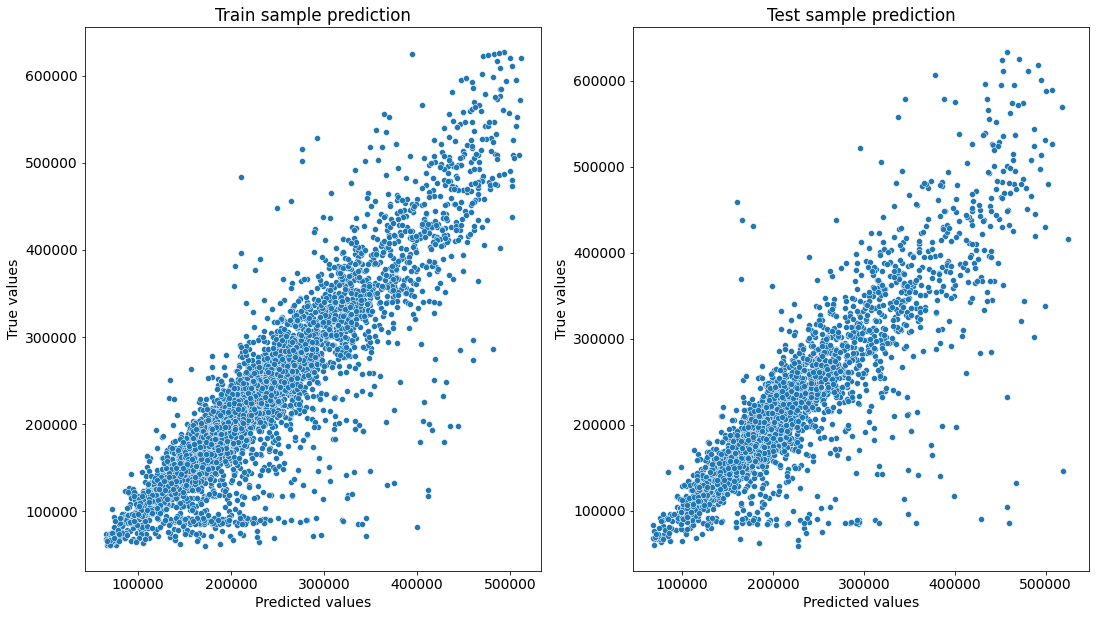

In [157]:
y_train_preds = rf_model.predict(x_train)
y_test_preds = rf_model.predict(x_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

Кросс-валидация

In [158]:
cv_score = cross_val_score(rf_model, x_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.7443092 , 0.71515892, 0.74897798])

In [159]:
cv_score.mean()

0.7361487023336335

Важность признаков

In [160]:
feature_importances = pd.DataFrame(zip(x_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.456149
14,MeanPriceBySquere,0.312174
13,MedPriceBySocial,0.084978
9,MedPriceByFloorRooms,0.024272
10,MedPriceByDistrYear,0.023584
11,MedPriceByEcology,0.017474
0,Rooms,0.017091
3,HouseYear,0.017063
5,LifeSquare,0.010621
2,HouseFloor,0.008701


8. Прогнозирование на тестовом датасете

In [162]:
predictions = rf_model.predict(test_df)
predictions

array([169244.35999898, 124615.3331402 , 143273.74941566, ...,
       150960.73208278, 191779.33073955, 247797.79802771])

In [165]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [166]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,169244.359999
1,5925,124615.333140
2,960,143273.749416
3,3848,122219.303765
4,746,177323.253852


In [167]:
submit.to_csv('rf_submit.csv', index=False)